### Алгоритмы замены страниц, реализованные в этом проекте
- OPT - Оптимальный алгоритм
- LRU _(Least Recently Used)_ - Выталкивание дольше всего не использовавшейся страницы
- FIFO _(First In First Out)_ - Выталкивание первой пришедшей страницы
- NFU _(Not Frequently Used)_ - Выталкивание редко используемой страницы

Алгоритмы реализованы в виде функций `opt`, `lru`, `fifo`, `nfu` в файле `algorithm.py`. \
Функции для перевода ФИО в последовательность `calculate_sequences` и слияния их `merge_sequences` находятся в файле `utils.py`

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import algorithm as alg
from page import Page, PageMode
from utils import make_requests, declension

student_list = [
#   'Добрынин Антон Сергеевич',
    'Дюкин Петр Радиевич',
    'Ермаков Никита Евгеньевич',
    'Ершова Ксения Глебовна',
#   'Зернюков Никита Андреевич'
]

requests = make_requests(student_list)

### `test.py` файл
Здесь проверяются функции:
- `calculate_sequences`
- `merge_sequences`
- `make_requests` (композиция двух предыдущих)

Данные для проверки взяты из `pdf` файла с заданиями для контрольной работы 2

In [2]:
import test

Test calculate sequences: OK
Test merge sequences: OK
Test make sequence: OK


### Выбор стратегии поиска
Нужно изменить `Page.mode` на `PageMode.GLOBAL` или `PageMode.LOCAL`, от этого будет зависить только переопределенные операторы сравнения `__eq__` и хэширования `__hash__` (для `MemorySet` это необходимо)

In [3]:
Page.mode = PageMode.LOCAL

### Вывод таблицы с помощью `TableLogger`
> Для записи каждого запроса используется `TableLogger` из модуля `logger.py`, который по умолчанию
> используется в декораторе `page_replace_decorator` в модуле `algorithm.py`.

Для вывода таблицы можно вызвать метод `print` у экземпляра класса `TableLogger`, который возвращает вызов функций из модуля `algorithm.py`. \
Содержимое лучше просмотреть в текстовом редакторе.

In [4]:
max_size = 10
logger = alg.opt(requests, max_size)
logger.print()

+--------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|sequence|1-1|2-2|3-2|1-2|2-1|3-4|1-3|2-4|3-3|1-1|2-3|3-1|1-2|2-3|3-1|1-2|2-4|3-3|1-2|2-4|3-4|1-1|2-2|3-3|1-1|2-1|3-4|1-2|2-3|3-1|1-2|2-4|3-2|1-3|2-3|3-4|1-2|2-3|3-3|1-1|2-4|3-3|2-1|3-1|
+--------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|memory  |1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|1-1|2-2|2-2|2-2|2-2|2-2|2-2|3-2|3-2|3-2|3-2|3-2|
|        |   |2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|2-2|3-2|3-2|3-2|3-2|3-2|3-2|1-2|1-2|1-2|1-2|1-2|
|        |   |   |3-2|3-2|3-2|3-2|3-2|3-2|3-2|3-2|3-2|3-2|3-2|3-2

### Вывод таблицы с помощью библиотеки pandas
Можно передать поле `rows` логгера в `pandas.DataFrame` и увидеть в более удобном формате. \
А также вывести количество промахов `faults`.

In [5]:
df = pd.DataFrame(logger.rows)
display(df)
print('В результате -', logger.faults, 'промах' + declension(logger.faults, ['', 'а', 'ов']))

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,sequence,1-1,2-2,3-2,1-2,2-1,3-4,1-3,2-4,3-3,...,2-3,3-4,1-2,2-3,3-3,1-1,2-4,3-3,2-1,3-1
1,memory,1-1,1-1,1-1,1-1,1-1,1-1,1-1,1-1,1-1,...,2-2,2-2,2-2,2-2,2-2,3-2,3-2,3-2,3-2,3-2
2,,,2-2,2-2,2-2,2-2,2-2,2-2,2-2,2-2,...,3-2,3-2,3-2,3-2,3-2,1-2,1-2,1-2,1-2,1-2
3,,,,3-2,3-2,3-2,3-2,3-2,3-2,3-2,...,1-2,1-2,1-2,1-2,1-2,2-1,2-1,2-1,2-1,2-1
4,,,,,1-2,1-2,1-2,1-2,1-2,1-2,...,2-1,2-1,2-1,2-1,2-1,3-4,3-4,3-4,3-4,3-4
5,,,,,,2-1,2-1,2-1,2-1,2-1,...,3-4,3-4,3-4,3-4,3-4,2-4,2-4,2-4,2-4,2-4
6,,,,,,,3-4,3-4,3-4,3-4,...,2-4,2-4,2-4,2-4,2-4,3-3,3-3,3-3,3-3,3-3
7,,,,,,,,1-3,1-3,1-3,...,3-3,3-3,3-3,3-3,3-3,2-3,2-3,2-3,2-3,2-3
8,,,,,,,,,2-4,2-4,...,2-3,2-3,2-3,2-3,2-3,3-1,3-1,3-1,3-1,3-1
9,,,,,,,,,,3-3,...,3-1,3-1,3-1,3-1,3-1,1-3,1-3,1-3,1-3,1-3


В результате - 3 промаха


### Сеточный проход параметров с сохранением в `.csv` файлы
Небольшая функция `grid_make_csv` и настраиваимые параметры `grid_params` для сохранения всех комбинаций таблиц.
> Из машинного обучения, по образу и подобию [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Все файлы сохранятся в папке `tables`.

In [6]:
def grid_make_csv(grid_params):
    for mode in grid_params['mode']:
        for alg_name in grid_params['alg_name']:
            for max_size in grid_params['max_size']:
                Page.mode = mode
                mode_name = mode.value
                logger = getattr(alg, alg_name)(requests, max_size)
                df = pd.DataFrame(logger.rows)
                df.to_csv(f'tables/table_{mode_name}_{alg_name}_{max_size}_log.csv')
                print(mode_name, alg_name, max_size, logger.faults, 'промах' + declension(logger.faults, ['', 'а', 'ов']))
                
grid_params = {
    'mode': [PageMode.LOCAL, PageMode.GLOBAL],
    'alg_name': ['opt', 'lru', 'fifo', 'nfu'],
    'max_size': [10]
}

grid_make_csv(grid_params)

local opt 10 3 промаха
local lru 10 4 промаха
local fifo 10 6 промахов
local nfu 10 4 промаха
global opt 10 0 промахов
global lru 10 0 промахов
global fifo 10 0 промахов
global nfu 10 0 промахов


### Сравнение эффективности алгоритмов
На графике отображается количество промохов с ростом размера памяти (в страницах)
> Так же взято из машинного обучения, где часто приходится смотреть графики

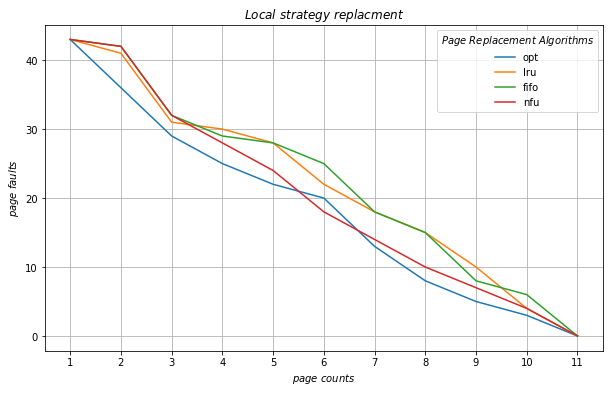

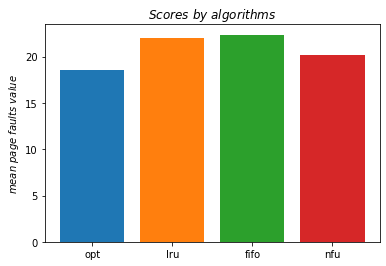

Рейтинг алгоритмов по средним значениям:
opt - 18.55
nfu - 20.18
lru - 22.00
fifo - 22.36


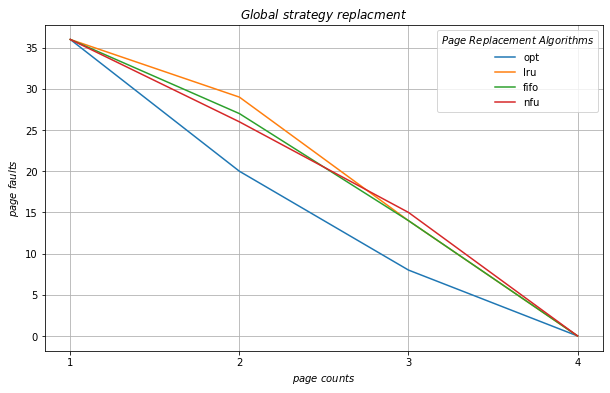

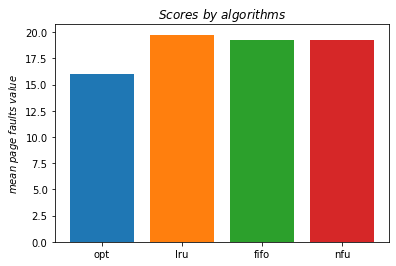

Рейтинг алгоритмов по средним значениям:
opt - 16.00
fifo - 19.25
nfu - 19.25
lru - 19.75


In [7]:
def calc_faults(algorithm, max_size):
    return algorithm(requests, max_size).faults

local_xend = 12
global_xend = 5
alg_names = ['opt', 'lru', 'fifo', 'nfu']

for mode, X in zip([PageMode.LOCAL, PageMode.GLOBAL],
                   [range(1, local_xend), range(1, global_xend)]):
    means = []
    Page.mode = mode
    plt.figure(figsize=(10, 6))
    plt.grid()
    plt.xticks(X)
    plt.title(f'${mode.value.title()}\ strategy\ replacment$')
    for alg_name in alg_names:
        Y = [calc_faults(getattr(alg, alg_name), x) for x in X]
        means.append((alg_name, sum(Y) / len(Y)))
        plt.plot(X, Y, label=alg_name)

    plt.xlabel('$page\ counts$')
    plt.ylabel('$page\ faults$')

    plt.legend(title='$Page\ Replacement\ Algorithms$')
    plt.show()
    
    for i, t in enumerate(means):
        plt.bar(i, t[1])
        
    plt.ylabel('$mean\ page\ faults\ value$')
    plt.title('$Scores\ by\ algorithms$')
    plt.xticks(range(4), labels=alg_names)

    plt.show()
    
    sorted_means = sorted(means, key=lambda x: x[1])
    print('Рейтинг алгоритмов по средним значениям:')
    for mean in sorted_means:
        print(f'{mean[0]} - {mean[1]:.2f}')

### Выводы
Как можно заметить, в обоях стратегиях поиска оптимальный алгоритм работает почти всегда лучше остальных. \
В локальном, при объеме памяти в 6 страниц, видимо сыграла роль сама последовательность запросов, но это лишь исключение. \
Алгоритм NFU показывает себя лучше, чем LRU хотя считается, что второй ближе к оптимальному.

### Используемые источники
- https://intuit.ru/studies/professional_retraining/941/courses/31/lecture/986?page=2
- https://en.wikipedia.org/wiki/Page_replacement_algorithm